<a href="https://colab.research.google.com/github/mgnarag/binarization-autoencoder/blob/main/Tracing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
!ls drive/My\ Drive
file_path = "/content/drive/My Drive/Architectural_designs/one quadrant/CS 282 Project/"

'107.1 syllabus 1SAY1920 FINAL.gdoc'
'1C-01 Narag et al (1).pdf'
'1C-01 Narag et al.pdf'
'1FA971504AC646559D05A8ED6341AFB3[1025340].png'
'1H-04 Narag et al.pdf'
 20220802_182749.heic
 20220802_182831.heic
 20220802_183259.heic
 20220803_125819.heic
 20220803_125842.heic
 20220803_144229.heic
 20220803_144422.heic
 20220803_160724.heic
 20220803_160751.heic
 20220803_165240.heic
 20220803_165318.heic
 20220803_174701.heic
 20220803_174706.heic
 20220804_175217.heic
 20220804_175443.heic
 20220804_175616.heic
 20220804_181917.heic
 20220804_182007.heic
 20220804_182117.heic
 2S22-23_LE3-Regular-Set-A-FINAL-KEY.pdf
'A4_Physics 71 TWHFU-3_gradesheet (1).pdf'
'A4_Physics 71 TWHFU-3_officialgrades (1).pdf'
'A4_Physics 71 TWHFU-3_officialgrades.gdoc'
'Abstract - NARAG, Mark Jeremy.pdf'
'Annex 1 (copy of Journal).pdf'
'Annex 2 (Proof of employments).pdf'
'App Physics 181 THY-FX-2_studentcontactlist.xlsx'
 Architectural_designs
'Arki abstract.pdf'
'Arki full paper.pdf'
'Binarizing architectural

In [5]:

import time
import pandas as pd


import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


from PIL import Image, ImageOps
import os
import numpy as np

epoch = 100
model_number = 4
size = 64

def crop(im):
    width, height = im.size
    data = []

    for j in np.arange(0,int(height/size)+1,0.25):
        for i in np.arange(0,int(width/size)+1,0.25):
            im1 = im.crop((0 + (size*i), 0 + (size*j), size + (size*i), size + (size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            im1 = im1/255
            data.append(im1)
    return data




input = np.array(crop(ImageOps.grayscale(Image.open(file_path + "INPUT_traced.png"))))
print("Done reading the input of size = ", input.shape)

output = np.array(crop(ImageOps.grayscale(Image.open(file_path + "OUTPUT_traced.png"))))
print("Done reading the output of size = ", input.shape)

train_input = []
test_input = []
for i in range(0,len(input)):
    if i % 4 == 0:
        test_input.append(input[i])
    else:
        train_input.append(input[i])

train_input = np.array(train_input)
test_input = np.array(test_input)

print("Done reading the train input of size = ", train_input.shape)
print("Done reading the test input of size = ", test_input.shape)

train_output = []
test_output = []
for i in range(0,len(output)):
    if i % 4 == 0:
        test_output.append(output[i])
    else:
        train_output.append(output[i])

train_output = np.array(train_output)
test_output = np.array(test_output)

print("Done reading the train output of size = ", train_input.shape)
print("Done reading the test output of size = ", test_input.shape)

Done reading the input of size =  (14336, 64, 64)
Done reading the output of size =  (14336, 64, 64)
Done reading the train input of size =  (10752, 64, 64)
Done reading the test input of size =  (3584, 64, 64)
Done reading the train output of size =  (10752, 64, 64)
Done reading the test output of size =  (3584, 64, 64)


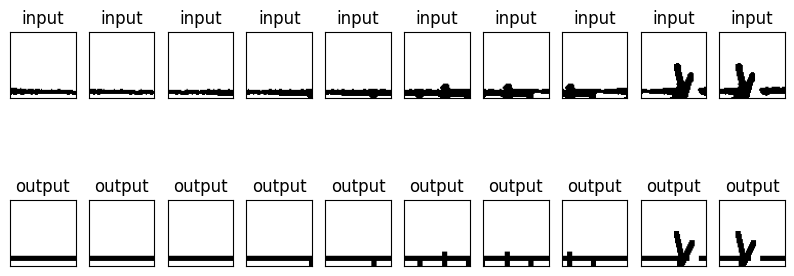

In [7]:

n = 10
plt.figure(figsize=(10, 4))
for i in range(0,10):

    ax = plt.subplot(2, n, i + 1)
    plt.title("input")
    plt.imshow((train_input[i+100]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    bx = plt.subplot(2, n, i + n + 1)
    plt.title("output")
    plt.imshow((train_output[i+100]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()



In [10]:
start = time.time()
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class autoenc(Model):
  def __init__(self):
    super(autoenc, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(size, size, 1)),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(256, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(128, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = autoenc()


autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

model = autoencoder.fit(train_input, train_output,
                epochs=epoch,
                shuffle=True,
                validation_data=(test_input, test_output))

autoencoder.encoder.summary()


autoencoder.save(file_path + 'autoencoder_'+str(model_number))

loss = model.history['loss']
loss = pd.DataFrame(loss)
loss.to_csv(file_path + 'loss_'+str(model_number)+'.csv')
val_loss = model.history['val_loss']
val_loss = pd.DataFrame(val_loss)
val_loss.to_csv(file_path + 'val_loss_'+str(model_number)+'.csv')

# record end time
end = time.time()

print("The time of execution of above program is :",
      (end-start), "seconds")

Epoch 1/100
336/336 [==============================] - 13s 28ms/step - loss: 0.0358 - val_loss: 0.0183
Epoch 2/100
336/336 [==============================] - 9s 27ms/step - loss: 0.0174 - val_loss: 0.0175
Epoch 3/100
336/336 [==============================] - 10s 28ms/step - loss: 0.0158 - val_loss: 0.0155
Epoch 4/100
336/336 [==============================] - 9s 28ms/step - loss: 0.0145 - val_loss: 0.0146
Epoch 5/100
336/336 [==============================] - 10s 29ms/step - loss: 0.0130 - val_loss: 0.0129
Epoch 6/100
336/336 [==============================] - 10s 29ms/step - loss: 0.0114 - val_loss: 0.0113
Epoch 7/100
336/336 [==============================] - 9s 27ms/step - loss: 0.0095 - val_loss: 0.0091
Epoch 8/100
336/336 [==============================] - 9s 28ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 9/100
336/336 [==============================] - 9s 27ms/step - loss: 0.0051 - val_loss: 0.0055
Epoch 10/100
336/336 [==============================] - 9s 28ms/step - loss: 0

In [31]:
def normalize(arr):
    """
    Linear normalization
    http://en.wikipedia.org/wiki/Normalization_%28image_processing%29
    """
    arr = arr.astype('float')
    # Do not touch the alpha channel
    for i in range(3):
        minval = arr[...,i].min()
        maxval = arr[...,i].max()
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (255.0/(maxval-minval))
    return arr


filename = "output v5.png"
directory = file_path  + filename
#directory = 'test_output_v'+str(model)+'.png'
dirty = ImageOps.grayscale(Image.open(directory))
dirty = np.array(dirty)
dirty = Image.fromarray(normalize(dirty).astype('uint8'))

w_dirty, h_dirty = dirty.size


METRIC = []


from tensorflow import keras
autoencoder = keras.models.load_model(file_path + 'autoencoder_'+str(model_number))
n_size = 64

xx = int(w_dirty/n_size)
final=[]

for portion in range(0,1):
    test = dirty
    im1 = test.crop((n_size*portion, 0, (n_size*portion) + n_size, h_dirty))
    w1, h1 = im1.size
    w = int(w1/n_size)
    h = int(h1/n_size)

    neverbeforeseen = np.array(crop(im1))
    encoded_imgs = autoencoder.encoder(neverbeforeseen).numpy()
    decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

    col = np.vstack((decoded_imgs[0],decoded_imgs[1]))
    for i in range(2,h):
        col = np.vstack((col,decoded_imgs[i]))

    y = np.where(col > 0.5,1,0) #round the values
    y = (y * 255).astype('uint8')
    if portion == 0:
        final = y
    if portion > 0:
        final = np.hstack((final,y))

final = np.squeeze(final)
reconstructed = Image.fromarray(final)

final = np.squeeze(final)
reconstructed = Image.fromarray(final)
reconstructed.save(file_path + "Tested_"+filename)